In [100]:
# imports and loading
from pymodulon.io import *
from pymodulon.plotting import *
from os import path

data_dir = path.join('..','data','processed_data')
interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(interim_dir,'zmo_raw.json.gz'))

import plotly.express as px
import pandas as pd

import matplotlib.pyplot as plt
import mplcursors
from matplotlib.lines import Line2D

def custom_compare_activities(ica_data, imodulon1, imodulon2, color_by_col = '', **kwargs):
    """
    Create an interactive scatterplot comparing the compendium-wide activities of two iModulons.

    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon1: int or str
        Name of the iModulon to plot on the x-axis
    imodulon2: int or str
        Name of the iModulon to plot on the y-axis
    **kwargs:
        Additional keyword arguments passed to :func:`pymodulon.plotting.scatterplot`

    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the scatterplot
    """
    
    # Extract data
    x = ica_data.A.loc[imodulon1]
    y = ica_data.A.loc[imodulon2]
    c = ['blue' for _ in x]
    if len(color_by_col) > 0:
        df = ica_data.sample_table[color_by_col]
        unique_categories = df.unique()
        cmap = plt.get_cmap('tab20')
        category_colors = {category: cmap(i / len(unique_categories)) for i, category in enumerate(unique_categories)}
        c = df.map(category_colors).tolist()
        
        
    labels = ica_data.sample_table.full_name.values

    xlabel = f"{imodulon1} iModulon Activity"
    ylabel = f"{imodulon2} iModulon Activity"

    # Remove xlabel, ylabel, and fit_line kwargs if provided
    kwargs.pop("xlabel", None)
    kwargs.pop("ylabel", None)
    kwargs.pop("fit_line", None)

    # Scatter Plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c = c, **kwargs)

    # Set axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Add interactive cursor for hovering
    cursor = mplcursors.cursor(scatter, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.index])  # Show label for hovered point
    
    if len(color_by_col) > 0:
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category) 
                       for category, color in category_colors.items()]

        # Add the custom legend
        plt.legend(handles=legend_elements, title="Aerobicity Categories", loc='upper left', bbox_to_anchor=(1, 1))
        plt.subplots_adjust(right=.6)
    return ax

%matplotlib widget

In [115]:
iM1 = 'motility_1'
iM2 = 'translation_1'

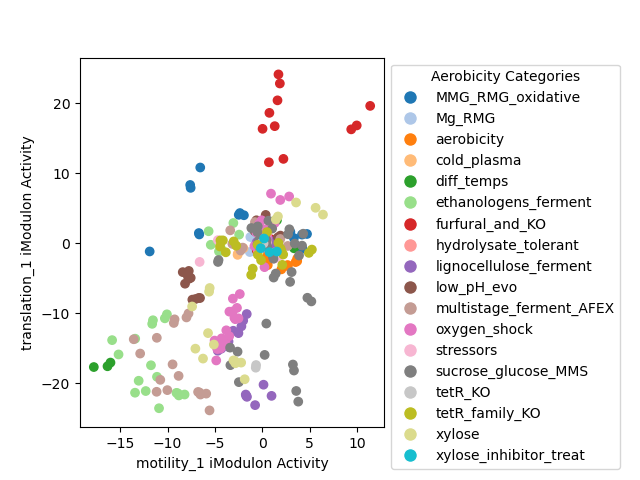

In [116]:
custom_compare_activities(ica_data, iM1, iM2, color_by_col = 'study')
plt.show()

In [31]:
ica_data.view_imodulon(iM1)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,chromosome_id
ZCP4_0092,0.124386,gpmA,CP006818.1,NaN,101594.0,102280.0,+,phosphoglycerate mutase,Carbohydrate transport and metabolism,P30798,Op234,CP006818.1
ZCP4_0117,0.081000,ZCP4_0117,CP006818.1,NaN,132676.0,132999.0,+,hypothetical protein,No COG annotation,NaN,Op258,CP006818.1
ZCP4_0322,0.129047,eda,CP006818.1,NaN,362336.0,362962.0,-,2-keto-3-deoxy-phosphogluconate aldolase,Carbohydrate transport and metabolism,Q00384,Op452,CP006818.1
ZCP4_0604,0.123002,gfo,CP006818.1,NaN,689454.0,690755.0,+,putative dehydrogenase,Function unknown,Q07982,Op718,CP006818.1
ZCP4_0621,0.116757,atpF,CP006818.1,NaN,710898.0,711536.0,-,F0F1-type ATP synthase%2C beta subunit,Energy production and conversion,Q5NPR5,Op735,CP006818.1
ZCP4_0622,0.111882,atpF,CP006818.1,NaN,711550.0,712050.0,-,F0F1-type ATP synthase%2C beta subunit,Energy production and conversion,Q5NPR7,Op736,CP006818.1
ZCP4_0623,0.142469,ZCP4_0623,CP006818.1,NaN,712172.0,712411.0,-,ATP synthase F0 subcomplex C subunit,Energy production and conversion,Q5NPR8,Op737,CP006818.1
ZCP4_0624,0.123656,atpB,CP006818.1,NaN,712447.0,713247.0,-,ATP synthase F0 subcomplex A subunit,Energy production and conversion,Q5NPR9,Op738,CP006818.1
ZCP4_0625,0.099825,ZCP4_0625,CP006818.1,NaN,713292.0,713609.0,-,hypothetical protein,Function unknown,D2N0W2,Op739,CP006818.1
ZCP4_0903,0.100852,glk,CP006818.1,NaN,995849.0,996823.0,-,glucokinase,Carbohydrate transport and metabolism,P21908,Op1007,CP006818.1


In [32]:
ica_data.view_imodulon(iM2)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,chromosome_id
ZCP4_0003,0.080955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No COG category,NaN,NaN,CP006818.1
ZCP4_0096,0.128894,dxs1,CP006818.1,NaN,106384.0,108333.0,+,1-deoxy-D-xylulose-5-phosphate synthase,Coenzyme transport and metabolism,Q5NN52,Op238,CP006818.1
ZCP4_0258,0.130503,ZCP4_0258,CP006818.1,NaN,296378.0,296812.0,-,hypothetical protein,"Intracellular trafficking, secretion, and vesi...",NaN,Op391,CP006818.1
ZCP4_0259,0.141491,ZCP4_0259,CP006818.1,NaN,296809.0,297213.0,-,SufE protein probably involved in Fe-S center ...,Function unknown,NaN,Op392,CP006818.1
ZCP4_0436,0.094182,ispH,CP006818.1,NaN,488707.0,489729.0,+,4-hydroxy-3-methylbut-2-enyl diphosphate reduc...,Lipid transport and metabolism,Q5NP61,Op557,CP006818.1
ZCP4_0437,0.102759,ZCP4_0437,CP006818.1,NaN,489733.0,490878.0,+,hopanoid biosynthesis associated radical SAM p...,Function unknown,Q5NP62,Op558,CP006818.1
ZCP4_0444,0.078673,ZCP4_0444,CP006818.1,NaN,497743.0,498756.0,-,hopanoid-associated sugar epimerase,Cell wall/membrane/envelope biogenesis,NaN,Op565,CP006818.1
ZCP4_0578,0.146638,ZCP4_0578,CP006818.1,NaN,656796.0,658889.0,+,soluble lytic murein transglycosylase-like pro...,Cell wall/membrane/envelope biogenesis,NaN,Op694,CP006818.1
ZCP4_0579,0.188910,greB,CP006818.1,NaN,658964.0,659461.0,+,transcription elongation factor GreB,Transcription,Q5NPL8,Op695,CP006818.1
ZCP4_1049,0.074333,ZCP4_1049,CP006818.1,NaN,1182706.0,1182858.0,-,hypothetical protein,No COG annotation,NaN,Op1151,CP006818.1


In [112]:
df = ica_data.sample_table
samps = df[df['study'] == 'oxygen_shock'].index
bby_A = ica_data.A[samps]
bby_A['mean'] = bby_A.mean(axis = 1)
bby_A.sort_values(by = 'mean', key = abs, ascending = False)

/home/chris/miniforge3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SRX5252024,SRX5252025,SRX5252026,SRX5252027,SRX5252028,SRX5252029,SRX5252030,SRX5252031,SRX5252032,SRX5252033,...,SRX5252050,SRX5252051,SRX5252052,SRX5252053,SRX5252054,SRX5252055,SRX5252056,SRX5252057,SRX5252058,mean
translation_1,1.114916,-7.902788,-13.892642,1.533214,0.752139,-7.240714,-9.758808,6.202788,0.479597,2.901778,...,-16.732050,-14.845309,-15.105812,1.035276,-0.650371,-0.384905,2.777529,3.302071,7.105483,-5.817718
SG_8,-0.310473,-8.052028,-9.283623,-0.758782,-0.836782,-9.206699,-8.085259,-2.282595,-0.261826,-0.690529,...,-8.227724,-9.567402,-8.417729,-0.146076,-0.146809,0.292886,-0.981619,-1.065527,-2.741507,-5.232105
oxidation_response,-0.015779,-0.320909,-0.410084,0.530264,1.935491,1.216663,0.452221,9.252472,12.254945,13.905808,...,4.136538,5.254978,6.378903,0.023004,-0.119754,0.096750,0.576556,0.573559,1.314346,5.055991
ATP_synthase_1,0.350951,-6.362599,-10.664834,1.084913,0.855035,-5.548183,-7.586546,5.078602,-2.577912,-0.890317,...,-12.501492,-11.270628,-10.365880,0.763109,-0.375740,-0.387369,3.039456,2.313375,8.128824,-4.845301
SG_6,0.886144,9.146846,8.440713,0.273176,-0.006688,8.742795,8.967825,-1.011641,0.057107,-0.030749,...,8.134823,9.032515,8.030732,-0.378328,0.801909,-0.423582,-0.659067,0.117247,-1.471223,4.491774
unknown_1,0.093418,0.803486,1.109579,1.530927,5.028618,4.361037,2.815592,14.148814,10.011776,11.049764,...,3.239409,3.751138,5.413497,0.035301,-0.750590,0.715289,2.384359,1.374740,4.201291,4.218193
noise_4,6.339922,6.532720,6.874528,0.960394,5.069279,5.667528,7.408430,2.582433,4.929080,5.854432,...,7.523094,3.653975,-1.477600,-2.666506,7.267384,-4.600879,-2.113758,1.338376,0.332322,3.725992
translation_2,0.217072,-5.014783,-9.187370,-0.167960,2.472404,-3.600543,-6.149588,6.051369,2.386294,1.849673,...,-9.475965,-8.361163,-8.579581,0.125010,0.760845,-0.885855,0.905235,0.448830,4.893473,-3.261999
unknown_4,-0.084327,1.745617,2.325047,-0.512173,1.214633,2.121006,2.050487,-1.282952,5.844100,6.756396,...,4.290983,4.511600,5.264459,-0.196139,0.450624,-0.254485,-0.623850,-0.512447,-1.428628,2.261547
phage_response_1,0.583783,1.843284,2.944728,0.820407,-0.504050,1.027440,3.110138,-1.067306,-0.371253,0.826674,...,3.962642,4.561051,4.185369,-0.122263,-0.430975,0.553238,1.436285,1.796935,1.113837,2.012587
